In [ ]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
auxy = np.arange(2000,2021,1)
data = [0 for i in range(len(auxy))]                                                               
for i,a in enumerate(auxy):
  data[i] = pd.read_csv("drive/MyDrive/Colab Notebooks/radiacion/570486_21.17_-101.70_"+str(a)+".csv",
                        skiprows = 2,usecols= [1,2,3,4,5,6,7,11,13,19,20])
colnam = ['Month','Day','Hour','Minute','DHI','DNI','GHI','Cloud','ZAng','T','P']
for i in range(len(auxy)): data[i].columns = colnam
data[0].head()

,Month,Day,Hour,Minute,DHI,DNI,GHI,Cloud,ZAng,T,P
0,1,1,0,30,0,0,0,0,175.00,8,810
1,1,1,1,30,0,0,0,0,170.55,7,810
2,1,1,2,30,0,0,0,0,156.79,6,810
3,1,1,3,30,0,0,0,0,143.01,6,810
4,1,1,4,30,0,0,0,0,129.32,6,810


In [ ]:
def algiz(dat,m):
    tempCl,tempT = [[] for i in range(len(auxy))],[[] for i in range(len(auxy))]
    for i in range(len(auxy)):
        aux = dat[i][dat[i].Month == m]
        for j in range(7,19):
            temp = aux[aux.Hour == j]
            tempCl[i].append(np.array(temp.Cloud))
            tempT[i].append(np.average(temp['T']))
    return tempCl,tempT

In [ ]:
Clon,Tn = algiz(data,11) #(data, mes)
lab = ['Clear','P. clear', 'Fog', 'Water','Supercooled w','mixed','Opaque Ice',
       'Cirrus','Overlapping']#,'Overshooting','unknown','Dust','Smoke']
mark = ["o","x","P","*","+"]

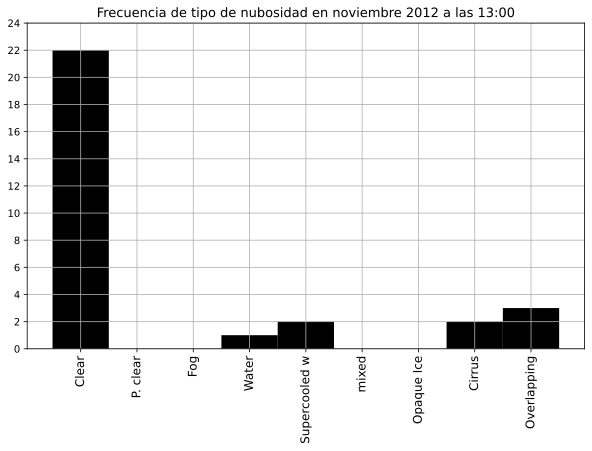

In [ ]:
year,hour = 12,13
plt.rcParams['figure.figsize'] = (10,6)
plt.hist(np.sort(Clon[year][hour-7]),bins = np.arange(0,10,1),color = 'black',align = 'left')
plt.xticks(np.arange(0,9,1),labels = lab,rotation = 'vertical',fontsize = 12)
plt.yticks(np.arange(0,25,2))
plt.title(''.join(('Frecuencia de tipo de nubosidad en noviembre ',str(auxy[year]),' a las ',str(hour),':00')),fontsize = 13)
plt.grid()
plt.show()

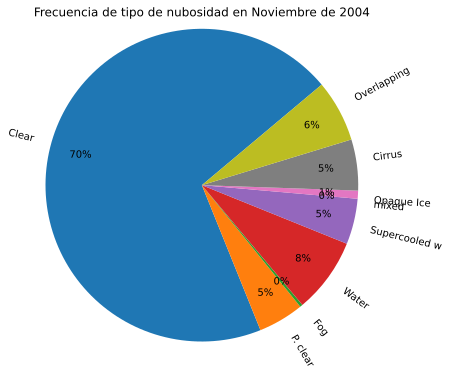

In [ ]:
year = 4
plt.pie(np.bincount(np.concatenate(Clon[year])),labels = lab,autopct='%1.0f%%',
        rotatelabels = True,startangle = 40, pctdistance = 0.8,radius = 1.2)
plt.title(''.join(('Frecuencia de tipo de nubosidad en Noviembre de ',str(auxy[year]))))
plt.show()

<function matplotlib.pyplot.show>

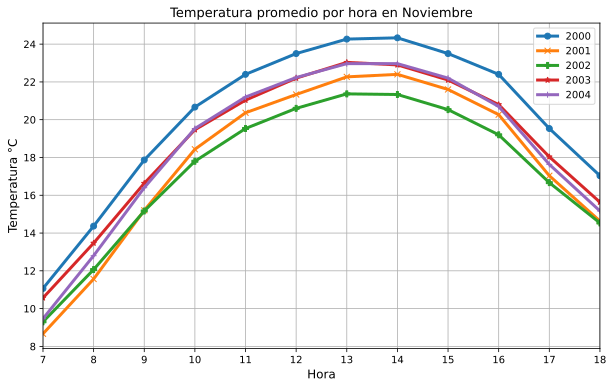

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
for i in range(5): plt.plot(Tn[i],label = auxy[i],linewidth = 3,marker = mark[i])
plt.xticks(np.arange(0,13,1),labels= np.arange(7,20,1))
plt.xlabel('Hora',fontsize = 12)
plt.ylabel('Temperatura °C',fontsize = 12)
plt.legend()
plt.title('Temperatura promedio por hora en Noviembre',fontsize = 13)
plt.xlim([0,11])
plt.grid()
plt.show